##Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#For Question 3
from sklearn import metrics
from sklearn.metrics import pairwise_distances

##Data Preprocessing

In [ ]:
url = 'https://drive.google.com/file/d/1UcnvyZG11vg1hbgG5Hnhn_zovJq9PqrK/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
dataset = pd.read_csv(path)

In [ ]:
def feature_scaling(X): #Making the points have zero mean and unit variance
  X_t = np.transpose(X)
  for i in range(len(X_t)):
    X_t[i]-=np.mean(X_t[i])
    X_t[i]/=np.std(X_t[i])
  return np.transpose(X_t)

<Axes: title={'center': 'Visualisation of Dataset 4 after feature scaling'}, xlabel='x-axis', ylabel='y-axis'>

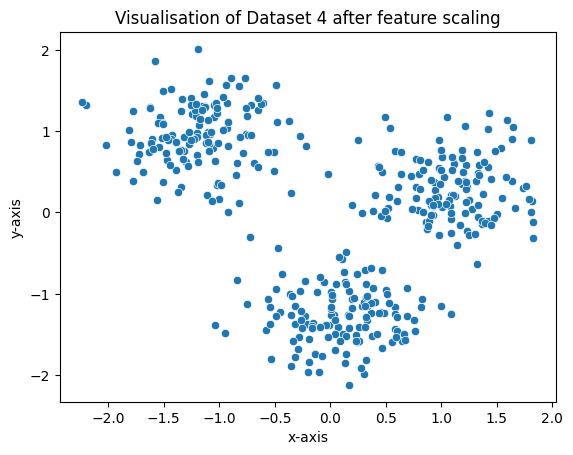

In [ ]:
data = dataset.to_numpy()
points = np.array(data[:,[0,1]])
points = feature_scaling(points)
X = points[:,0]
Y = points[:,1]
plt.title('Visualisation of Dataset 4 after feature scaling')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
sns.set(style='whitegrid')
sns.scatterplot(x=X,y=Y,data=points)

##Gausian Mixture Model Classifier

In [ ]:
def multivariate_normal(X,mean,covariance_mat):
  return (2*np.pi)**(-len(X)/2)*np.linalg.det(covariance_mat)**(-1/2)*np.exp(-np.dot(np.dot((X-mean).T, np.linalg.inv(covariance_mat)), (X-mean))/2)

In [ ]:
def GMM_Classifier(points,k,max_iterations):

  #Initialisation
  iterations = max_iterations
  shape = points.shape
  n,m = shape
  phi = [1/k for i in range(k)]
  weights = np.full(shape=shape, fill_value=1/k)
  random_row = np.random.randint(low=0, high=n, size=k) #Randomly split the data
  mu = [points[i,:] for i in random_row ]
  sigma = [ np.cov(points.T) for i in range(k) ]
  log_likelihoods = []

  for iter in range(iterations):

    #E Step
    likelihood = np.zeros((n, k) )
    for j in range(n):
      for i in range(k):
        likelihood[j][i] = multivariate_normal(points[j],mu[i],sigma[i])
    numerator = likelihood * phi
    denominator = numerator.sum(axis=1)[:, np.newaxis]
    weights = numerator / denominator
    phi=weights.mean(axis=0)

    #M step
    for i in range(k):
      weight = weights[:, [i]]
      total_weight = weight.sum()
      mu[i] = (points * weight).sum(axis=0) / total_weight
      sigma[i] = np.cov(points.T, aweights=(weight/total_weight).flatten(), bias=True)

    log_likelihoods.append(np.log(np.sum(numerator)))
  clusters = np.transpose(np.argmax(weights, axis=1))
  return log_likelihoods,clusters

##Questions

###Implement EM for GMM and plot the log-likelihood as a function of iterations

Plot log-likelihood vs iterations for k (no. of clusters) = 3, since from initial look of data, 3 clusters can be seen (initial guess)

In [ ]:
log_likelihoods, clusters = GMM_Classifier(points,3,100)

<Axes: title={'center': 'Log-likelihood vs iterations'}, xlabel='Iterations', ylabel='Log-likelihood'>

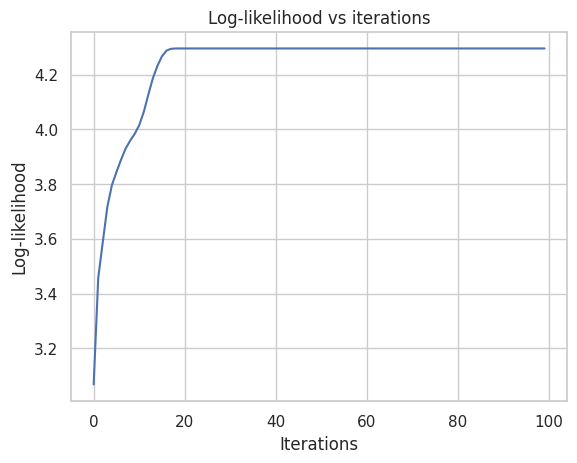

In [ ]:
plt.title('Log-likelihood vs iterations')
plt.xlabel('Iterations')
plt.ylabel('Log-likelihood')
sns.lineplot(data=log_likelihoods)

### Run EM for different numbers of Gaussians (k)(Try 2,3,4,5,6). Plot figures that can help in visualization and also log likelihood as a function of iteration for different values of k. Report the observations.

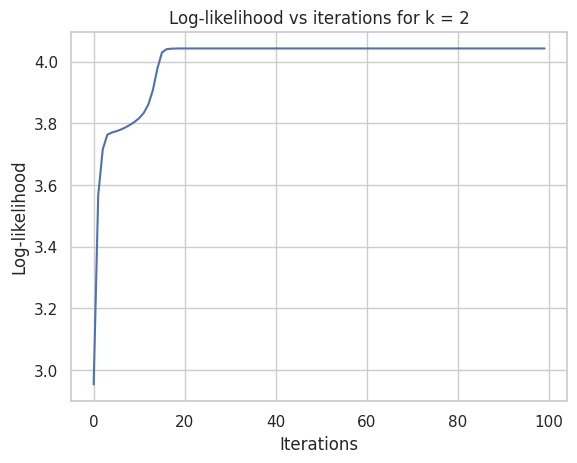

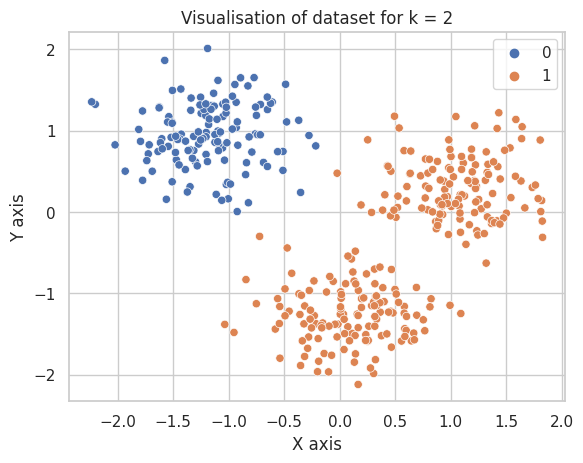

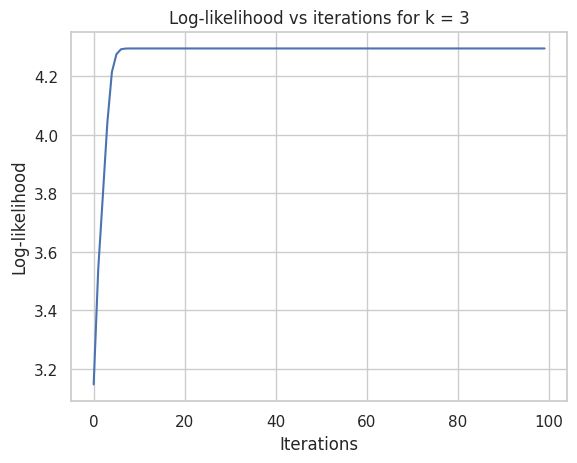

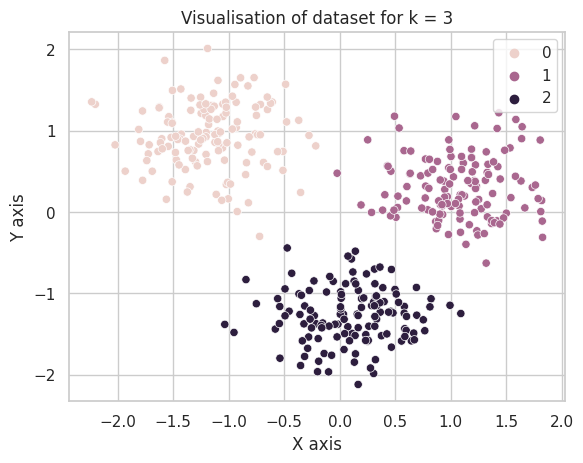

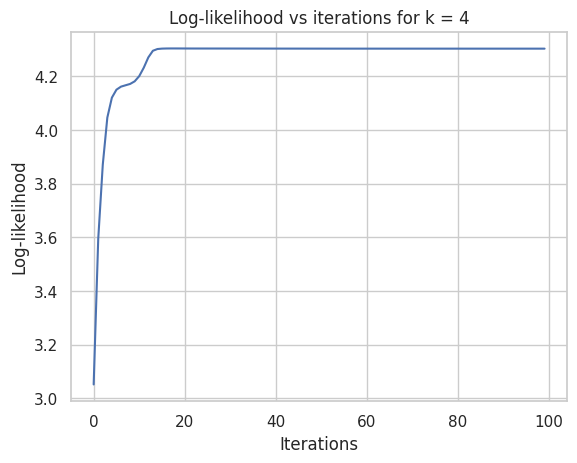

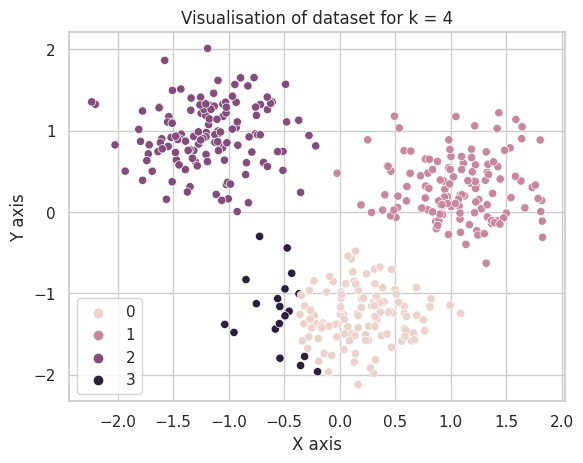

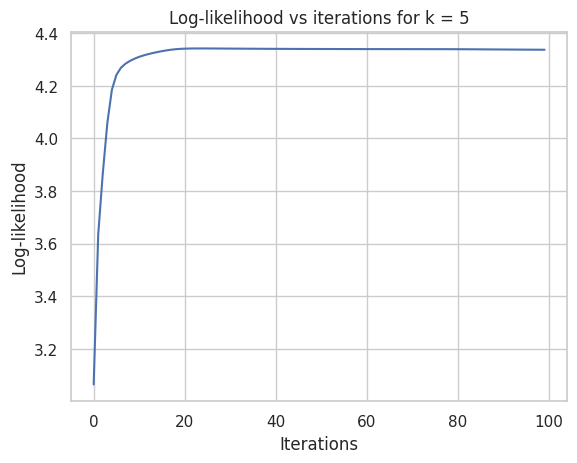

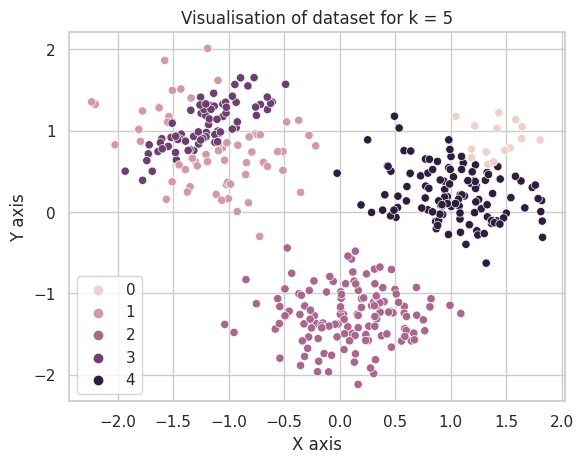

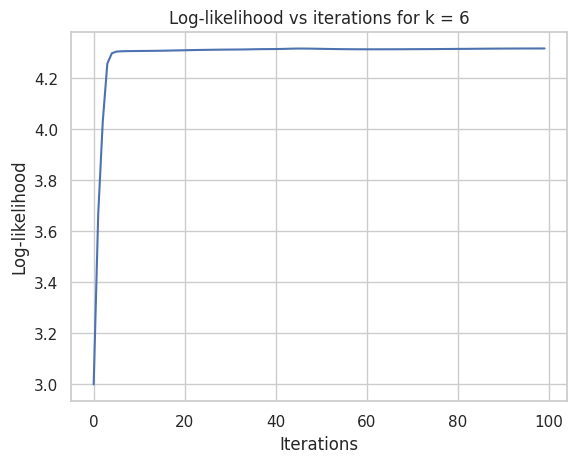

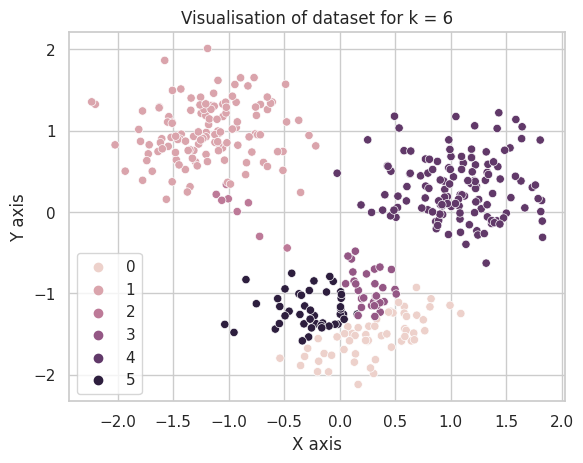

In [ ]:
for i in range(2,7):
  log_likelihoods, clusters = GMM_Classifier(points,i,100)
  plt.figure()
  plt.title('Log-likelihood vs iterations for k = '+str(i))
  plt.xlabel('Iterations')
  plt.ylabel('Log-likelihood')
  sns.lineplot(data=log_likelihoods)
  plt.figure()
  plt.title('Visualisation of dataset for k = '+str(i))
  plt.xlabel('X axis')
  plt.ylabel('Y axis')
  sns.scatterplot(x=X,y=Y,data=points,hue=clusters)

###Find the optimal k. There are several metrics like Silhouette score, Distance between GMMs, and Bayesian information criterion (BIC), or even you can use loglikelihood from the last question to infer. Give a clear explanation for your decision. Note: You can use third-party libraries - sklearn or any other only in this subsection.


**Silhouette Score**

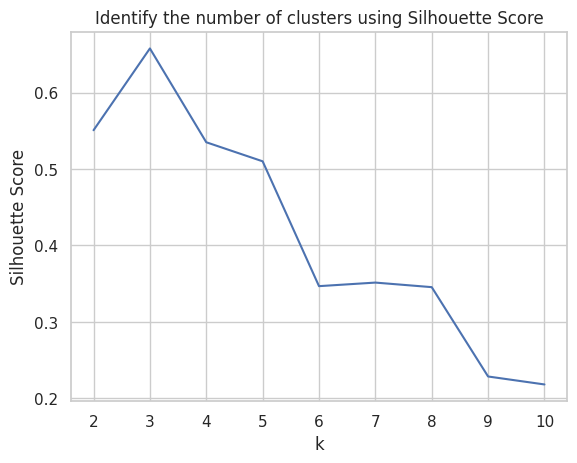

In [ ]:
S=[]
K=range(2,11)
for k in K:
    log_likelihoods, clusters = GMM_Classifier(points,k,100)
    S.append(metrics.silhouette_score(points, clusters, metric='euclidean'))

plt.figure()
sns.lineplot(x=K,y=S)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

##References
1. https://github.com/ScienceKot/mysklearn/blob/master/Gaussian%20Mixture%20Models/GMM.py
2. https://python-course.eu/machine-learning/expectation-maximization-and-gaussian-mixture-models-gmm.php
3. https://www.oranlooney.com/post/ml-from-scratch-part-5-gmm/
